In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import absolute, mean, std
from sklearn import linear_model, metrics
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, ElasticNet, MultiTaskElasticNetCV
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix, r2_score, mean_squared_error

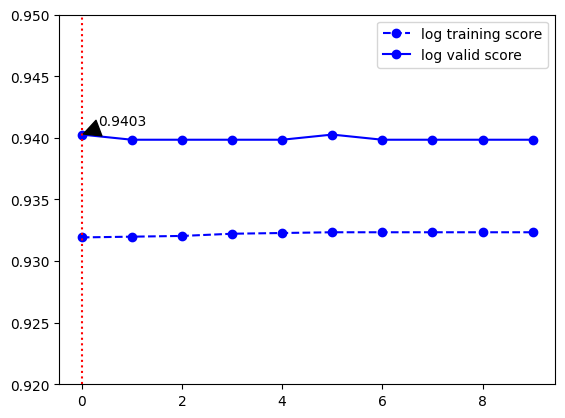

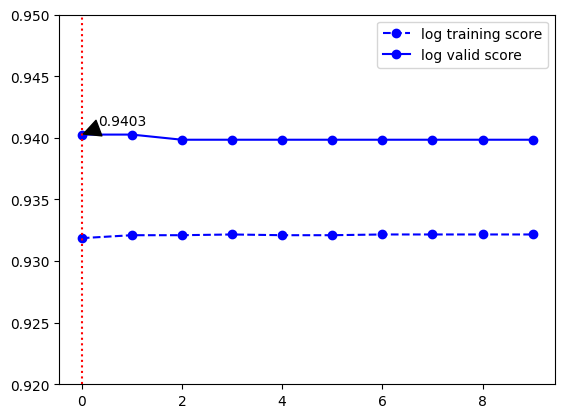

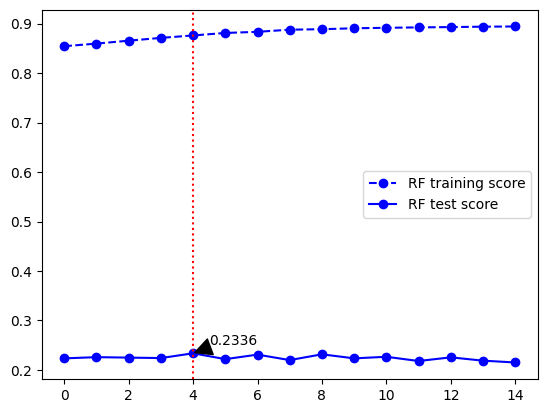

************************************************************
There are 6 set of X
X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 4 set of Y
y_train_t1, y_train_t2, y_valid_t1, y_valid_t2
when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'
************************************************************


In [3]:
%run Data_preprocessing.ipynb

# Imbalanced Learning

In [4]:
Full = pd.DataFrame(np.concatenate((X_train_selected_t1_norm,pd.DataFrame(y_train_t1_value)),axis=1))
Full

label0 = Full[Full[51]==0]
label1 = Full[Full[51]==1]
print(label0.shape,label1.shape)

(15535, 52) (1225, 52)


In [5]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_over, y_over = oversample.fit_resample(X_train_selected_t1_norm, y_train_t1_value)


y_over = pd.DataFrame(y_over)
y_over.shape
x_over.shape

(31070, 51)

In [6]:
Full = pd.DataFrame(np.concatenate((x_over,y_over),axis=1))
Full

label0 = Full[Full[51]==0]
label1 = Full[Full[51]==1]
print(label0.shape,label1.shape)

(15535, 52) (15535, 52)


In [7]:
X_train_norm=x_over

y_train_t1 = y_over

## Task 1


In [8]:
# Find most suitable index that can make the model perform best
l1_ratio_list=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
c_list=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10, 20, 50]


auc of  0.05  :  0.8355967416310623
auc of  0.1  :  0.8355967416310625
auc of  0.2  :  0.8356084792713273
auc of  0.3  :  0.8355732663505329
auc of  0.4  :  0.8355468566599371
auc of  0.5  :  0.8355380534297386
auc of  0.6  :  0.8355497910700033
auc of  0.7  :  0.8355527254800695
auc of  0.8  :  0.8355497910700033
auc of  0.9  :  0.8355527254800693
auc of  1.0  :  0.8355351190196723
auc of  10  :  0.8355409878398048
auc of  20  :  0.8355380534297385
auc of  50  :  0.8355380534297385


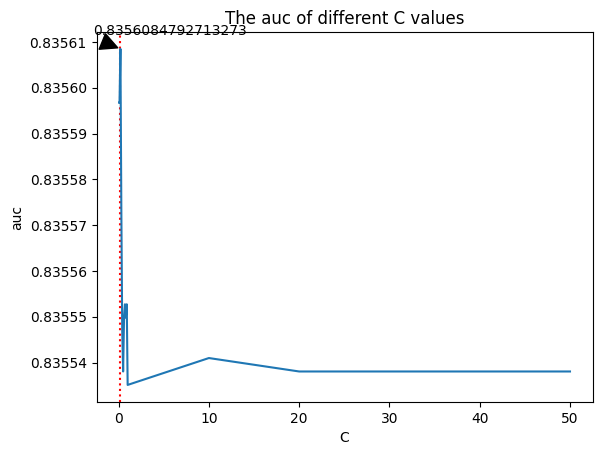

In [11]:
# train the logistic model with different c
import matplotlib.pyplot as plt

auc_list=[]
for c in c_list:
    clf = LogisticRegression(C= c, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=0.7).fit(X_train_norm, y_train_t1)
    y_valid_score=clf.decision_function(X_valid_selected_t1_norm)
    # compute ROC curve and AUC for each learning rate
    fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
    roc_auc = auc(fpr, tpr)
    auc_list.append(roc_auc)
    print("auc of ", c ," : ", roc_auc)

max_auc=max(auc_list)
index= auc_list.index(max_auc)
loc=c_list[index]
plt.title("The auc of different C values")
plt.xlabel("C")
plt.ylabel("auc")
plt.axvline(x=loc, linestyle="dotted", color='r')
plt.annotate(max_auc, (loc, max_auc), xycoords="data", xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10, horizontalalignment="center", verticalalignment="top")
plt.plot(c_list, auc_list)
#find best C: 0.2

auc of  0.1  :  0.8355527254800695
auc of  0.2  :  0.835558594300202
auc of  0.3  :  0.8355644631203344
auc of  0.4  :  0.8355967416310625
auc of  0.5  :  0.8355762007605991
auc of  0.6  :  0.8356114136813935
auc of  0.7  :  0.8356084792713273
auc of  0.8  :  0.8356143480914597
auc of  0.9  :  0.8356202169115919
auc of  1.0  :  0.8355791351706653


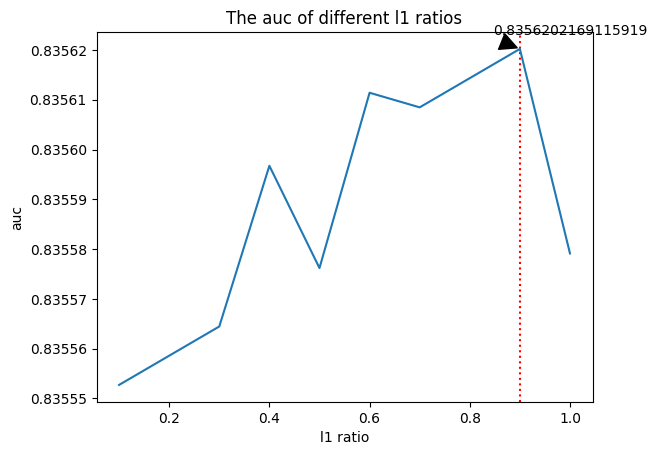

In [15]:
# train the logistic model with different l1 ratio
auc_list2=[]
for l1_ratio in l1_ratio_list:
    clf = LogisticRegression(C=0.2, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=l1_ratio).fit(X_train_norm, y_train_t1)
    y_valid_score=clf.decision_function(X_valid_selected_t1_norm)
    # compute ROC curve and AUC for each learning rate
    fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
    roc_auc = auc(fpr, tpr)
    auc_list2.append(roc_auc)
    print("auc of ", l1_ratio ," : ", roc_auc)

max_auc=max(auc_list2)
index= auc_list2.index(max_auc)
loc=l1_ratio_list[index]
plt.title("The auc of different l1 ratios")
plt.xlabel("l1 ratio")
plt.ylabel("auc")
plt.axvline(x=loc, linestyle="dotted", color='r')
plt.annotate(max_auc, (loc, max_auc), xycoords="data", xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10, horizontalalignment="center", verticalalignment="top")
plt.plot(l1_ratio_list, auc_list2)
#find best l1-ratio: 0.9

Output the result

In [16]:
clf1 = LogisticRegression(C=0.2, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.9).fit(X_train_norm, y_train_t1)
y_pred_1=clf1.predict(X_test_selected_t1_norm)

In [17]:

pd.DataFrame(y_pred_1).to_excel(excel_writer=r"C:\Users\gcq20\Desktop\STAT3612\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project-\imbalanced1.xlsx")

Model Performance

In [18]:
clf1 = LogisticRegression(C=20, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.6).fit(X_train_norm, y_train_t1)
print(clf1.score(X_valid_selected_t1, y_valid_t1_value))
y_pred_1=clf1.predict(X_valid_selected_t1)

0.8061821219715957


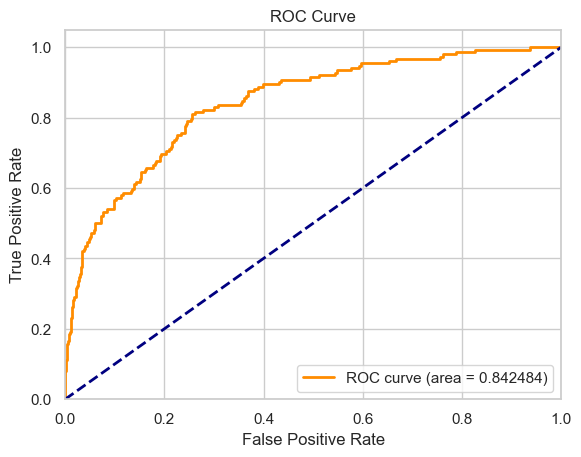

In [19]:
cm=confusion_matrix(y_valid_t1_value, y_pred_1)
y_valid_score=clf1.decision_function(X_valid_selected_t1)

# compute ROC curve and AUC for each learning rate
fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")